In [11]:
import scipy.integrate as intg
def f(x):
    return x**2
result, error = intg.quad(f, 0, 1)
f"Definite Integral Result: {result} and error : {error}"

'Definite Integral Result: 0.33333333333333337 and error : 3.700743415417189e-15'

   0   -6.990000   81.820100
   1   -4.835195   47.719888
   2    0.203610   4.227016
   3    2.000000   1.000000
Minimum: [2.]


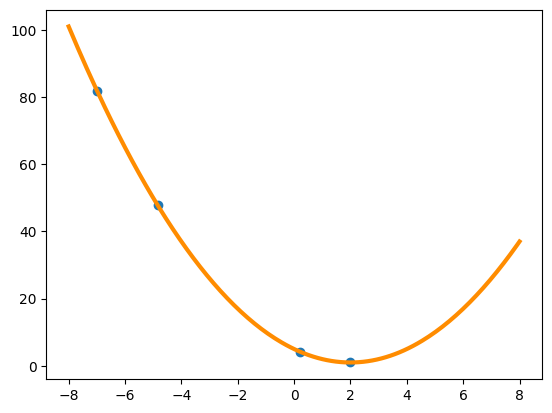

In [27]:
import scipy.optimize as opt

xn = np.linspace(-8, 8, 200)

def f(x):
    return (x - 2) ** 2 + 1
xs=[]
niter=0
def callback(Xi):
    global niter
    print('{:4d}   {: 3.6f}  {: 3.6f}'.format(niter, Xi[0], f(Xi[0])))
    xs.append(Xi[0])
    niter += 1
    
#result = opt.minimize(f, x0=-8, method='Nelder-Mead', callback=callback)
#result = opt.minimize(f, x0=-8, method='CG', callback=callback)
result = opt.minimize(f, x0=-8, method='BFGS', callback=callback)
print("Minimum:", result.x)
plt.plot(xn, f(xn), 'darkorange', linewidth =3.0)
plt.scatter(xs, f(np.array(xs)))


Iteration  0 [1.61346893 1.25725724] 22.36466029462774
Iteration  1 [2.12013363 1.34802243] 4.93821763071157
Iteration  2 [2.2782394  1.38630586] 3.191362158378851
Iteration  3 [2.32658064 1.40801304] 2.9998084404523424
Iteration  4 [2.3403609  1.42445195] 2.962692480854468
Iteration  5 [2.34326403 1.43918406] 2.9410732511517357
Iteration  6 [2.34274876 1.45333121] 2.921168650257434
Iteration  7 [2.34116402 1.46724695] 2.901609994922481
Iteration  8 [2.33924954 1.48104284] 2.8822597957714953
Iteration  9 [2.33723823 1.49475427] 2.863102691843529
Iteration  10 [2.33520343 1.50839259] 2.8441354520876647
Iteration  11 [2.33316818 1.52196164] 2.8253560654210825
Iteration  12 [2.33113971 1.53546282] 2.806762658501532
Iteration  13 [2.32912026 1.54889683] 2.788353388225001
Iteration  14 [2.32711051 1.5622641 ] 2.7701264308993587
Iteration  15 [2.32511064 1.57556501] 2.752079981008035
Iteration  16 [2.32312065 1.58879988] 2.734212250926478
Iteration  17 [2.32114054 1.60196905] 2.7165214707346

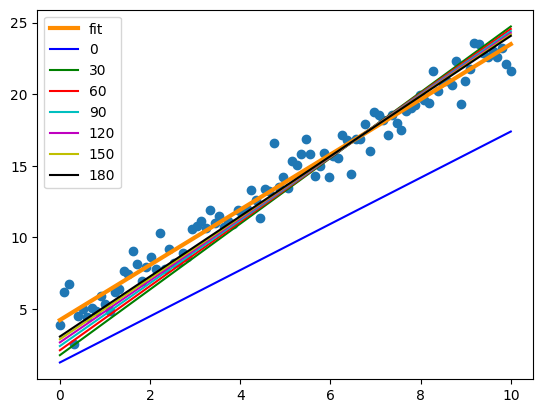

In [7]:
#Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

x = np.linspace(0, 10, 100)
#print(x)
y = 2*x + 4 + np.random.normal(size=x.size)
#print(y)
plt.scatter(x,y)

def f(k):
    sqerr = (k[0]*x +k[1] - y) ** 2
    return sqerr.mean()

def f_prime(k):
    g_bias =  2 * (k[0]*x +k[1] - y)
    g_slope = g_bias * x
    return np.array([g_slope.mean(), g_bias.mean()])

ks = []
bs = []
def SD(starting_point, learning_rate, n_iters):
    x=starting_point
    for i in range(n_iters):
        grad = f_prime(x)
        x = x - learning_rate * grad
        f_n = f(x)
        print("Iteration ", i, x, f_n)
        if len(ks) < 7 and i%30==0:
           ks.append(x[0])
           bs.append(x[1])
        if f_n < 0.00001:
            break
    return x

def cal_y(k, b):
    return k*x+b

colors = ['b', 'g', 'r', 'c', 'm','y', 'k']
k0=np.array([0,1])

k_opt = SD(k0, 0.01, 1000)
y_pred = k_opt[0] *x + k_opt[1]
plt.plot(x, y_pred, 'darkorange', linewidth =3.0, label='fit')
plt.legend()
for i in range(len(ks)):
    plt.plot(x, cal_y(ks[i], bs[i]), colors[i], label=str(i*30))
    plt.legend()

   0    0.997521    1.158276   73.799184
   1    2.221455    2.723413   1.084074
   2    2.123318    3.407050   0.732333
   3    2.017279    4.081554   0.615841
   4    2.017151    4.081643   0.615841
   5    2.017150    4.081641   0.615841
[2.01715026 4.08164128]


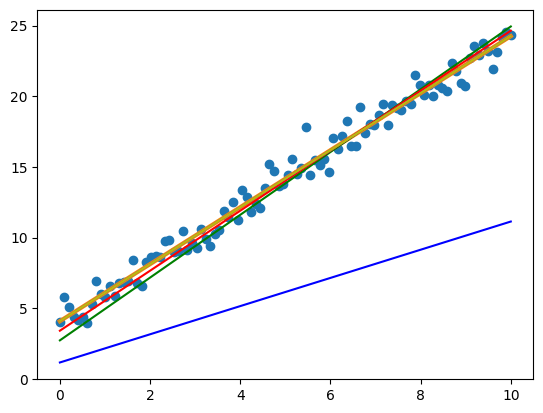

In [1]:
#Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

x = np.linspace(0, 10, 100)
#print(x)
y = 2*x + 4 + np.random.normal(size=x.size)
#print(y)
plt.scatter(x,y)

def f(k):
    sqerr = (k[0]*x +k[1] - y) ** 2
    return sqerr.mean()
  
niter=0
ks = []
bs = []
def callback(Xi):
    global niter
    print('{:4d}   {: 3.6f}   {: 3.6f}  {: 3.6f}'.format(niter, Xi[0], Xi[1], f(Xi)))
    ks.append(Xi[0])
    bs.append(Xi[1])
    niter += 1

def cal_y(k, b):
    return k*x+b

colors = ['b', 'g', 'r', 'c', 'm','y', 'b']
k0=np.array([0,1])
result = opt.minimize(f, x0=k0, callback=callback)
print(result.x)
y_pred = result.x[0] * x + result.x[1]
plt.plot(x, y_pred, 'darkorange', linewidth =3.0, label='fit')
for i in range(len(ks)):
    plt.plot(x, cal_y(ks[i], bs[i]), colors[i]) 
#k_opt = SD(k0, 0.01, 1000)
#y_pred = k_opt[0] *x + k_opt[1]
#plt.plot(x, y_pred)

In [5]:
pip install scipy

     |████████████████████████████████| 35.0 MB 323 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#from IPython.display import display, clear_output
#%matplotlib notebook

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure() #create a new figure with properties num (identifier), figsize (width, height), dpi (100.0)
ax = fig.add_subplot(111)
plt.ion() #enable interactive mode

#fig.add_subplot(221)   #top left  the 1th grid of a 2*2 grid
#fig.add_subplot(222)   #top right
#fig.add_subplot(223)   #bottom left
#fig.add_subplot(224)   #bottom right 
#plt.show()
fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

<IPython.core.display.Javascript object>

In [2]:
pip install ipympl

     |████████████████████████████████| 511 kB 140 kB/s eta 0:00:01
     |████████████████████████████████| 139 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 3.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
